# Problème du sac à dos

## 1. Introduction

### Déclaration des variables et création d'une liste d'objets aléatoires
Le code suivant propose une création aléatoire d'une liste de $n$ objets permettant de tester les codes qui suivent.

In [1]:
import random as rd

w = 30 # Poids maximum contenant dans le sac
n = 20 # nombre d'objets disponibles
vmax = 10 # valeur maximale d'un objet
pmax = 10 # poids maximal d'un objet

objets = [(rd.randrange(vmax)+1, rd.randrange(pmax)+1) for i in range(n)]
print(objets)

[(6, 9), (9, 4), (7, 3), (4, 1), (7, 1), (10, 1), (8, 6), (6, 9), (10, 6), (3, 7), (2, 10), (2, 9), (4, 4), (7, 1), (2, 1), (10, 2), (4, 6), (8, 10), (6, 4), (2, 7)]


## 2. Algorithme de force brute
On teste toutes les combinaisons possibles.
Nous avons choisi d'identifier une combinaison de $n$ objets par un nombre en binaire à $n$ chiffres, chaque chiffre indiquant si l'objet correspondant est sélectionné dans la combinaison ou pas.

In [2]:
def forceBrute(objets,w):
    """
    Résolution du problème du sac à dos par force brute
    objets est une liste d'objets du type (poids,valeur)
    w est le poids maximum entrant dans le sac
    Un nombre en binaire permet d'indiquer quels objets sont sélectionnés.
    """
    n = len(objets)
    valeurmax = 0
    combinaisonmax = 0
    for combinaison in range(2**n):
        poids = 0
        valeur = 0
        combiBinaire = bin(combinaison)[2:]
        combiBinaire = (n-len(combiBinaire))*'0'+combiBinaire # avec n chiffres
        for j in range(n):
            if combiBinaire[j]=='1':
                poids += objets[j][1]
                if poids > w:
                    break
                valeur += objets[j][0]
        else:
            if valeur > valeurmax:
                valeurmax = valeur
                combinaisonmax = combiBinaire
    contenuSac = []
    for j in range(n):
        if combinaisonmax[j]=='1':
            contenuSac.append(objets[j])
    return valeurmax, contenuSac

In [3]:
print(forceBrute(objets,w))

(80, [(9, 4), (7, 3), (4, 1), (7, 1), (10, 1), (8, 6), (10, 6), (7, 1), (2, 1), (10, 2), (6, 4)])


__Q1. Quelle est, en fonction de $n$, la complexité de l'algorithme précédent ?__

__Q2. Estimer le temps de calcul de l'algorithme de force brute si on dispose de 50 objets ? 100 objets ?__

## 3. Exemples d'algorithmes gloutons

### Exemple 1

On remplit le sac à dos en mettant d'abord les objets de plus grande valeur, jusqu'à ce que plus aucun objet ne rentre dans le sac.


__Q3. Programmer cet algorithme.__ 
Écrire d'abord une fonction tri utilisant le tri par insertion.

In [1]:
def tri(lst):
    "fonction à écrire"

In [2]:
def glouton1(objets,w):
    """
    Résolution du problème du sac à dos 
    On met en priorité les objets de plus grosse valeur
    """
    contenuSac = []
    valeur = 0

    return valeur, contenuSac

__Q5. Quelle est la complexité de cet algorithme ?__

__Q6. Comparer les deux algorithmes (force brute et glouton1).__

### Exemple 2

On remplit le sac à dos en mettant d'abord les objets avec le meilleur rapport valeur/poids, jusqu'à ce que plus aucun objet ne rentre dans le sac.


__Q8. Programmer cet algorithme.__ 

In [8]:
def glouton2(objets,w):
    """
    Résolution du problème du sac à dos 
    On met en priorité les objets de meilleur rapport valeur/poids
    """
    contenuSac = []
    valeur = 0

    return valeur, contenuSac

__Q9. Comparer les deux algorithmes gloutons.__

__Q10. Ecrire une fonction $glouton3$ renvoyant le meilleur résultat des deux fonctions $glouton1$ et $glouton2$.__

__Q11. Quelle est la complexité de l'algorithme $glouton3$ ?__

## 4. Tests d'efficacité des algorithmes gloutons

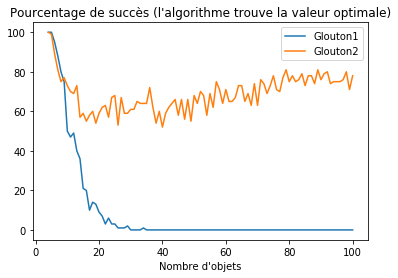

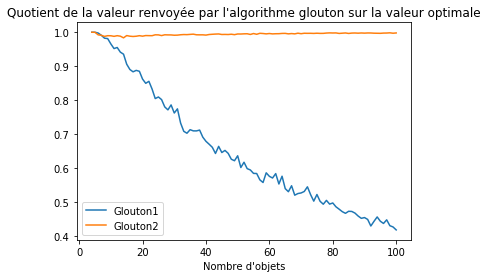

In [16]:
import matplotlib.pyplot as plt

def comparaison(n, w, vmax=15, pmax=10):
    objets = [(rd.randrange(vmax)+1, rd.randrange(pmax)+1) for i in range(n)]
    valeurOptimale = dynamique(objets,w)[-1][-1]
    valeurGlouton1 = glouton1(objets,w)[0]
    valeurGlouton2 = glouton2(objets,w)[0]
    return valeurGlouton1/valeurOptimale, valeurGlouton2/valeurOptimale

def plusieursComparaisons(nb, n, w, vmax=15, pmax=10):
    lstglouton1 = []
    lstglouton2 = []
    for i in range(nb):
        t1, t2 = comparaison(n,w,vmax,pmax)
        lstglouton1.append(t1)
        lstglouton2.append(t2)
    moyGlouton1 = sum(lstglouton1)/len(lstglouton1)
    moyGlouton2 = sum(lstglouton2)/len(lstglouton2)
    nbOptGlouton1 = sum(x==1.0 for x in lstglouton1)/nb*100
    nbOptGlouton2 = sum(x==1.0 for x in lstglouton2)/nb*100
    """
    print("Sur",nb,"simulations, l'algorithme glouton1 renvoie une valeur moyenne égale à ",moyGlouton1,"% de la valeur optimale.")
    print("Sur",nb,"simulations, l'algorithme glouton2 renvoie une valeur moyenne égale à ",moyGlouton2,"% de la valeur optimale.")
    print("Sur",nb,"simulations, l'algorithme glouton1 trouve la valeur optimale",nbOptGlouton1,"fois.")
    print("Sur",nb,"simulations, l'algorithme glouton2 trouve la valeur optimale",nbOptGlouton2,"fois.")
    """
    return moyGlouton1, moyGlouton2, nbOptGlouton1, nbOptGlouton2

def courbeGloutons(nb, nmax, w=30, vmax=15, pmax=10):
    lstmoyGlouton1 = []
    lstmoyGlouton2 = []
    lstnbOptGlouton1 = []
    lstnbOptGlouton2 = []
    lstabs = list(range(4,nmax+1,max(1,nmax//100)))
    for n in range(4,nmax+1,max(1,nmax//100)):
        moyGlouton1, moyGlouton2, nbOptGlouton1, nbOptGlouton2 = plusieursComparaisons(nb, n, w, vmax=15, pmax=10)
        lstmoyGlouton1.append(moyGlouton1)
        lstmoyGlouton2.append(moyGlouton2)
        lstnbOptGlouton1.append(nbOptGlouton1)
        lstnbOptGlouton2.append(nbOptGlouton2)
    plt.title("Pourcentage de succès (l'algorithme trouve la valeur optimale)")
    plt.plot(lstabs,lstnbOptGlouton1)
    plt.plot(lstabs,lstnbOptGlouton2)
    plt.legend(('Glouton1','Glouton2'))
    plt.xlabel("Nombre d'objets")
    plt.show()
    plt.title("Quotient de la valeur renvoyée par l'algorithme glouton sur la valeur optimale")
    plt.plot(lstabs,lstmoyGlouton1)
    plt.plot(lstabs,lstmoyGlouton2)
    plt.xlabel("Nombre d'objets")
    plt.legend(('Glouton1','Glouton2'))
    plt.show()
   
   
courbeGloutons(100,100)